# Make pretty graphs

In [129]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pickle as pkl
import pandas as pd
from ast import literal_eval as make_tuple

In [70]:
def add_mi_plurality_ensemble(bounds_dict, csv_path):
    df = pd.read_csv(csv_path)
    for key, colname in [('plurality', 'Plurality Ensemble'), ('mi', 'MI Ensemble')]:
        bounds_dict[key]['all_no_demographic'] = make_tuple(df[colname][1])
        bounds_dict[key]['black'] = make_tuple(df[colname][2])
        bounds_dict[key]['white'] = make_tuple(df[colname][3])
        bounds_dict[key]['female'] = make_tuple(df[colname][4])
        bounds_dict[key]['male'] = make_tuple(df[colname][5])
    # sanity check
#     print(bounds_dict)

In [212]:
plt.rcParams.update({'font.size': 10})

def bounds_graph(bounds_dict, title, savepath, bottom=-0.03, top = 0.7):
    # group by bound type
    # show different colors for different subgroups
    group_dict = {'all_no_demographic' : 'All', 'black' : 'Black', 'white' : 'White', 'female' : 'Female', 'male': 'Male'}
    bound_dict = {'maha': 'Mahalanobis', 'nn': 'Nearest Neighbor', 'mi': 'Mutual Information Ensemble', 'plurality': 'Plurality Error Ensemble'}
    hat_length = 0.04
    between_skip = 0.8
    within_skip = 0.1
    group_color = {'all_no_demographic' : 'black', 'black' : 'tab:purple', 'white' : 'fuchsia', 'female' : 'darkorange', 'male': 'brown'}
    plt.figure(figsize=(7, 5))
    for i, bound_type in enumerate(['maha', 'nn', 'mi', 'plurality']):       
        if bound_type in bounds_dict:
            for j, group in enumerate(['all_no_demographic', 'black', 'white', 'female', 'male']):
                lims = bounds_dict[bound_type][group]
                if bound_type == 'maha':
                    lims = (0, lims)
                label = group_dict[group] if i == 0 else None
                x_position = i * between_skip +j * within_skip
                plt.plot([x_position, x_position], lims, c=group_color[group], label=label)
                plt.hlines(lims, x_position - hat_length, x_position + hat_length, colors=group_color[group])
                
                if bound_type != 'maha':
                    if group == 'black':
                        # if non overlapping, add a highlight
                        group_set = ['black', 'white']
                        group_set.remove(group)
                        other_group = group_set[0]
                        if lims[0] > bounds_dict[bound_type][other_group][1] or lims[1] < bounds_dict[bound_type][other_group][0]:
                            plt.axvspan(x_position - hat_length, x_position + within_skip + hat_length, color='pink', alpha=0.4)
                    elif group == 'female':
                        group_set = ['female', 'male']
                        group_set.remove(group)
                        other_group = group_set[0]
                        if lims[0] > bounds_dict[bound_type][other_group][1] or lims[1] < bounds_dict[bound_type][other_group][0]:
                            plt.axvspan(x_position - hat_length, x_position + within_skip + hat_length, color='orange', alpha=0.1)
                
                    
    plt.ylim(bottom=bottom, top=top)
    plt.xticks([0.2, 1.0, 1.8, 2.6], ['Mahalanobis', 'Nearest\nNeighbor', 'MI\nEnsemble', 'PE\nEnsemble'])
    plt.yticks(np.arange(0, plt.gca().get_ylim()[1], 0.05))
    plt.title(title)
    
    yellow_patch = mpatches.Patch(color='pink', alpha=0.5, label='Non-overlapping\nby sex')
    blue_patch = mpatches.Patch(color='orange', alpha=0.1, label='Non-overlapping\nby race')

    
    
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(yellow_patch)
    handles.append(blue_patch)
    plt.legend(handles = handles, loc='upper center', ncol=4)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)

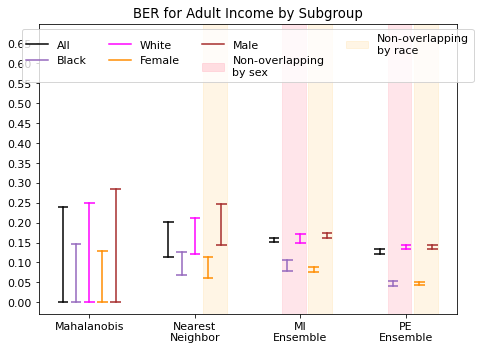

In [206]:
adult_dict = pkl.load(open("adult_bounds.pkl", "rb"))
add_mi_plurality_ensemble(adult_dict, "../google_sheets_bounds/adult_bounds.csv")
bounds_graph(adult_dict, "BER for Adult Income by Subgroup", "plots/adult.png")

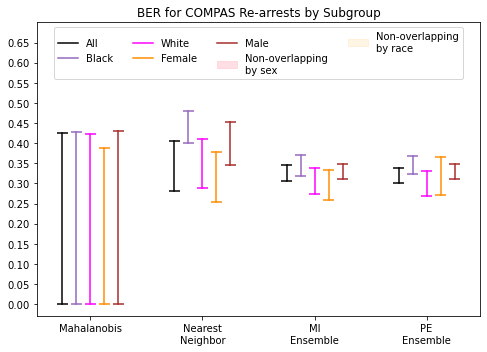

In [197]:
compas_rearrest = pkl.load(open("compas_arrest_bounds.pkl", "rb"))
add_mi_plurality_ensemble(compas_rearrest, "../google_sheets_bounds/compas_rearrest_bounds.csv")
bounds_graph(compas_rearrest, "BER for COMPAS Re-arrests by Subgroup", "plots/compas_arrest.png")

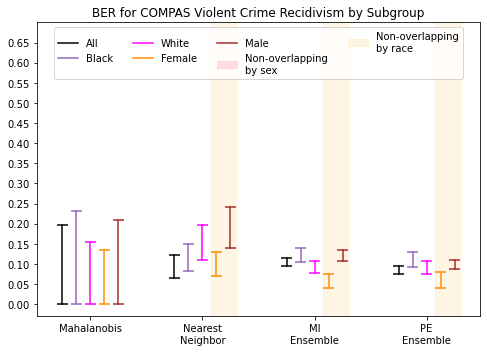

In [198]:
compas_violent = pkl.load(open("compas_violent_bounds.pkl", "rb"))
add_mi_plurality_ensemble(compas_violent, "../google_sheets_bounds/compas_violent_bounds.csv")
bounds_graph(compas_violent, 
             "BER for COMPAS Violent Crime Recidivism by Subgroup", 
             "plots/compas_violent.png")

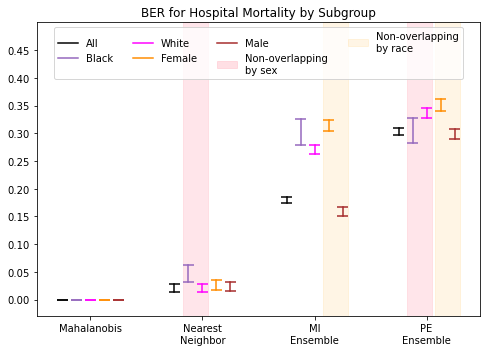

In [213]:
mimic_mortal = pkl.load(open("mimic_bounds.pkl", "rb"))
add_mi_plurality_ensemble(mimic_mortal, "../google_sheets_bounds/mimic_bounds.csv")
bounds_graph(mimic_mortal, 
             "BER for Hospital Mortality by Subgroup", 
             "plots/mimic.png", top=0.5)